In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder


In [2]:
# Reading 2012 to 2014


df1 = pd.read_csv("ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
df1.head(3)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0


In [3]:
# Reading 2015 to 2016

df2 = pd.read_csv("ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df2.head(3)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0


In [4]:
# Reading 2017 onwards

df3 = pd.read_csv("ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")
df3.head(3)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0


--------------------------------------------------PREPROCESSING------------------------------------------------------

In [5]:
#df1 does not have a "remaining_lease" column so, I choose the df2 and df3 only

#concatinating the df2 and df3

df4 = pd.concat([df2,df3],axis = 0)
df4.reset_index(drop = True, inplace = True)
df4.tail(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
221078,2024-07,YISHUN,EXECUTIVE,277,YISHUN ST 22,01 TO 03,146.0,Maisonette,1985,60 years 03 months,770000.0
221079,2024-07,YISHUN,EXECUTIVE,277,YISHUN ST 22,04 TO 06,146.0,Maisonette,1985,60 years 02 months,800000.0


In [6]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221080 entries, 0 to 221079
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                221080 non-null  object 
 1   town                 221080 non-null  object 
 2   flat_type            221080 non-null  object 
 3   block                221080 non-null  object 
 4   street_name          221080 non-null  object 
 5   storey_range         221080 non-null  object 
 6   floor_area_sqm       221080 non-null  float64
 7   flat_model           221080 non-null  object 
 8   lease_commence_date  221080 non-null  int64  
 9   remaining_lease      221080 non-null  object 
 10  resale_price         221080 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 18.6+ MB


In [7]:
df4.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

Encoding the catogarical columns and
chaning the datatype

In [8]:
df4.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0


In [9]:
df4["address"] = df4["block"]+"  "+df4["street_name"]

In [10]:
df5 = df4.drop(columns=["block","street_name"])

In [11]:
df5.head(3)

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address
0,2015-01,ANG MO KIO,3 ROOM,07 TO 09,60.0,Improved,1986,70,255000.0,174 ANG MO KIO AVE 4
1,2015-01,ANG MO KIO,3 ROOM,01 TO 03,68.0,New Generation,1981,65,275000.0,541 ANG MO KIO AVE 10
2,2015-01,ANG MO KIO,3 ROOM,01 TO 03,69.0,New Generation,1980,64,285000.0,163 ANG MO KIO AVE 4


In [12]:
df5["month"] = pd.to_datetime(df5["month"],format="%Y-%m")

In [13]:
df5.head(5)

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address
0,2015-01-01,ANG MO KIO,3 ROOM,07 TO 09,60.0,Improved,1986,70,255000.0,174 ANG MO KIO AVE 4
1,2015-01-01,ANG MO KIO,3 ROOM,01 TO 03,68.0,New Generation,1981,65,275000.0,541 ANG MO KIO AVE 10
2,2015-01-01,ANG MO KIO,3 ROOM,01 TO 03,69.0,New Generation,1980,64,285000.0,163 ANG MO KIO AVE 4
3,2015-01-01,ANG MO KIO,3 ROOM,01 TO 03,68.0,New Generation,1979,63,290000.0,446 ANG MO KIO AVE 10
4,2015-01-01,ANG MO KIO,3 ROOM,07 TO 09,68.0,New Generation,1980,64,290000.0,557 ANG MO KIO AVE 10


In [14]:
#Splitting month column to month ,day, year column

df5["year"] = df5["month"].dt.year
df5["month"] = df5["month"].dt.month

In [15]:
df5.head(2)

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year
0,1,ANG MO KIO,3 ROOM,07 TO 09,60.0,Improved,1986,70,255000.0,174 ANG MO KIO AVE 4,2015
1,1,ANG MO KIO,3 ROOM,01 TO 03,68.0,New Generation,1981,65,275000.0,541 ANG MO KIO AVE 10,2015


In [16]:
print(df5["town"].unique())
print(df5["town"].nunique())

['ANG MO KIO' 'BEDOK' 'BISHAN' 'BUKIT BATOK' 'BUKIT MERAH' 'BUKIT PANJANG'
 'BUKIT TIMAH' 'CENTRAL AREA' 'CHOA CHU KANG' 'CLEMENTI' 'GEYLANG'
 'HOUGANG' 'JURONG EAST' 'JURONG WEST' 'KALLANG/WHAMPOA' 'MARINE PARADE'
 'PASIR RIS' 'PUNGGOL' 'QUEENSTOWN' 'SEMBAWANG' 'SENGKANG' 'SERANGOON'
 'TAMPINES' 'TOA PAYOH' 'WOODLANDS' 'YISHUN']
26


In [17]:
print(df5["flat_model"].unique())
print(df5["flat_model"].nunique())

['Improved' 'New Generation' 'Model A' 'Standard' 'Simplified'
 'Premium Apartment' 'Maisonette' 'Apartment' 'Model A2' 'Type S1'
 'Type S2' 'Adjoined flat' 'Terrace' 'DBSS' 'Model A-Maisonette'
 'Premium Maisonette' 'Multi Generation' 'Premium Apartment Loft'
 'Improved-Maisonette' '2-room' '3Gen']
21


In [18]:
# choosing the "LabelEncoder" for "town",and "OrdinalEncoder" for the "flat_model" and the "flat_type"

df5["town"] = LabelEncoder().fit_transform(df5["town"])
df5["flat_model"] = OrdinalEncoder().fit_transform(df5[["flat_model"]])
df5["flat_type"] = OrdinalEncoder().fit_transform(df5[["flat_type"]])

In [19]:
df5.tail(2)

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year
221078,7,25,5.0,01 TO 03,146.0,7.0,1985,60 years 03 months,770000.0,277 YISHUN ST 22,2024
221079,7,25,5.0,04 TO 06,146.0,7.0,1985,60 years 02 months,800000.0,277 YISHUN ST 22,2024


In [20]:
#splitting storey range column into "storey_start" and "storey_end"

df5[["Storey_start","Storey_end"]] = df5["storey_range"].str.split(" TO ",expand=True)

In [21]:
df5.drop(columns=["storey_range"],inplace=True)

In [22]:
df5.tail(2)

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year,Storey_start,Storey_end
221078,7,25,5.0,146.0,7.0,1985,60 years 03 months,770000.0,277 YISHUN ST 22,2024,01,03
221079,7,25,5.0,146.0,7.0,1985,60 years 02 months,800000.0,277 YISHUN ST 22,2024,04,06


In [23]:
df5["address"].nunique()

9593

In [24]:
# Address have 9593 unique values in the 221079 , so i encode it for the correlation checking
# Iam choosing the "LabelEncoder" for the "address" column

df5["address"] = LabelEncoder().fit_transform(df5["address"])

In [25]:
df5["Storey_start"] = df5["Storey_start"].astype(int)
df5["Storey_end"] = df5["Storey_end"].astype(int)

In [26]:
# "remaining_lease" have a "60 years 8 months" this type of data ,
# so we want to split the year and month separately for the correlation checking

slv = []
for i in df5["remaining_lease"].astype(str):
    j = i.replace("years","")
    k = j.replace("months","")
    l = k.replace("month","")
    m = l.strip()
    n = m.split("  ")
    slv.append(n)

In [27]:
dfd = pd.DataFrame(slv,columns=["remaining_lease_year","remaining_lease_month",])

In [28]:
dfd["remaining_lease_year"] = dfd["remaining_lease_year"].astype(int)
dfd["remaining_lease_month"] = dfd["remaining_lease_month"].fillna(0).astype(int)

In [29]:
#dropping the "remaining_lease" column
df5.drop(columns=["remaining_lease"],inplace=True)

In [30]:
df6 = pd.concat([df5,dfd],axis=1)

In [31]:
df6.columns

Index(['month', 'town', 'flat_type', 'floor_area_sqm', 'flat_model',
       'lease_commence_date', 'resale_price', 'address', 'year',
       'Storey_start', 'Storey_end', 'remaining_lease_year',
       'remaining_lease_month'],
      dtype='object')

In [32]:
#Setting the columns

df7 = df6[['year','month', 'town', 'flat_type', 'floor_area_sqm', 'flat_model',
           'address','Storey_start', 'Storey_end', 'remaining_lease_year',
            'remaining_lease_month','lease_commence_date','resale_price']]

In [33]:
df8 = df7.sort_values(by=["year","month"])

In [34]:
df8.to_csv("ResaleFlatPrices.csv", index=False)

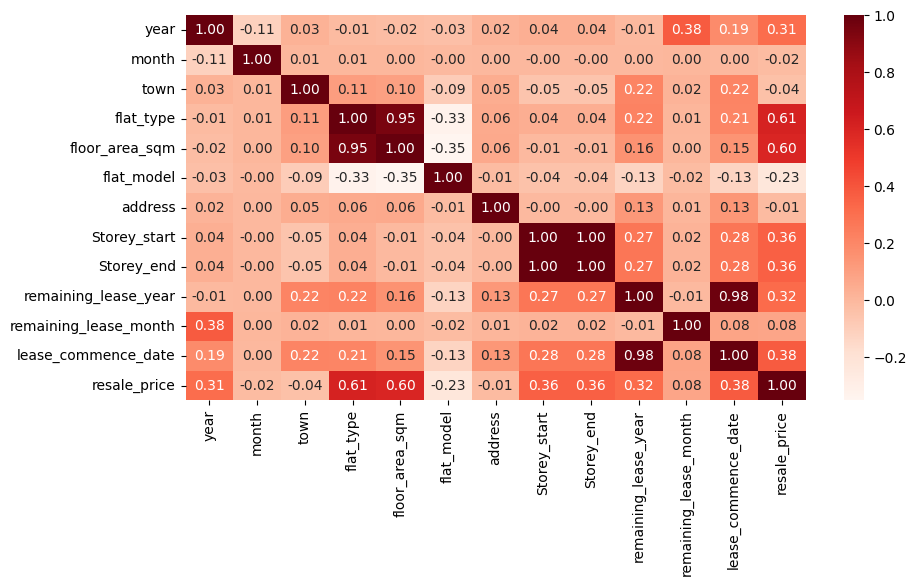

In [35]:
# Checking the correlation using heatmap

df8_crr = df8.corr()
plt.figure(figsize=(10,5))
sns.heatmap(df8_crr,annot=True,cmap="Reds",fmt=".2f")
plt.show()

In [36]:
dff = pd.read_csv("ResaleFlatPrices.csv")
dff.tail(2)

,year,month,town,flat_type,floor_area_sqm,flat_model,address,Storey_start,Storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
221078,2024,7,25,5.0,146.0,7.0,3284,1,3,60,3,1985,770000.0
221079,2024,7,25,5.0,146.0,7.0,3284,4,6,60,2,1985,800000.0


In [37]:
#Checking duplicate values
dff.duplicated().sum()

312

In [38]:
dff1 = dff.drop_duplicates()
dff1.reset_index(drop=True,inplace=True)

In [39]:
dff1.tail(2)

,year,month,town,flat_type,floor_area_sqm,flat_model,address,Storey_start,Storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
220766,2024,7,25,5.0,146.0,7.0,3284,1,3,60,3,1985,770000.0
220767,2024,7,25,5.0,146.0,7.0,3284,4,6,60,2,1985,800000.0


In [40]:
# The month,address column does have very lowest correlation with other features
# So I drop the month and address columns

dff2 = dff1.drop(columns=["month","address"])
dff2.tail(2)

,year,town,flat_type,floor_area_sqm,flat_model,Storey_start,Storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
220766,2024,25,5.0,146.0,7.0,1,3,60,3,1985,770000.0
220767,2024,25,5.0,146.0,7.0,4,6,60,2,1985,800000.0


In [41]:
# detecting the skewed columns using plot

def plot(df,column):
    
    # # Distplot
    plt.figure(figsize=(15,4))
    plt.subplot(1,3,1)
    sns.distplot(df[column])
    plt.title("Distplot for"+" "+column)

    # Histogram plot
    plt.subplot(1,3,2)
    sns.histplot(df, x=column,kde=True, bins=30, color="salmon" )
    plt.title("Histogram for"+" "+column)

    # Box plot
    plt.subplot(1,3,3)
    sns.boxplot(df,x=column)
    plt.title("Box Plot for"+" "+column)
    

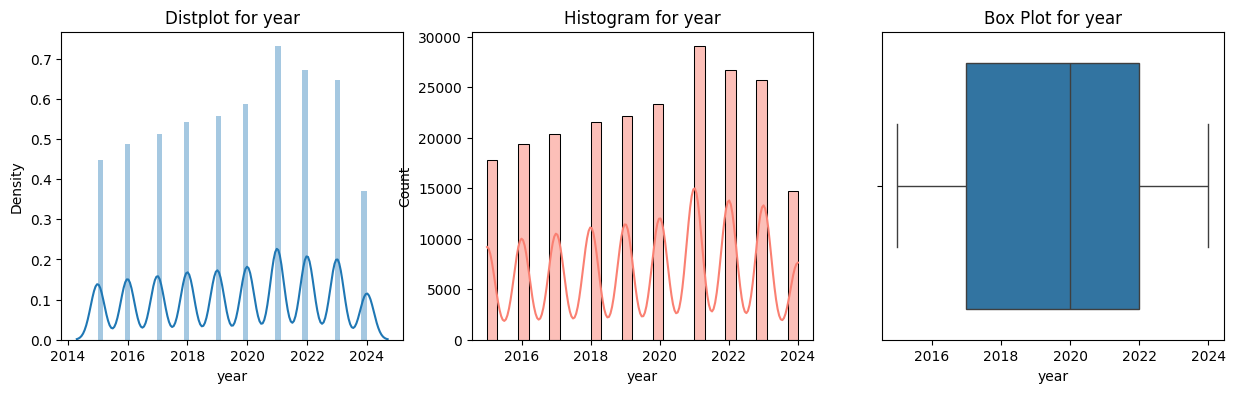

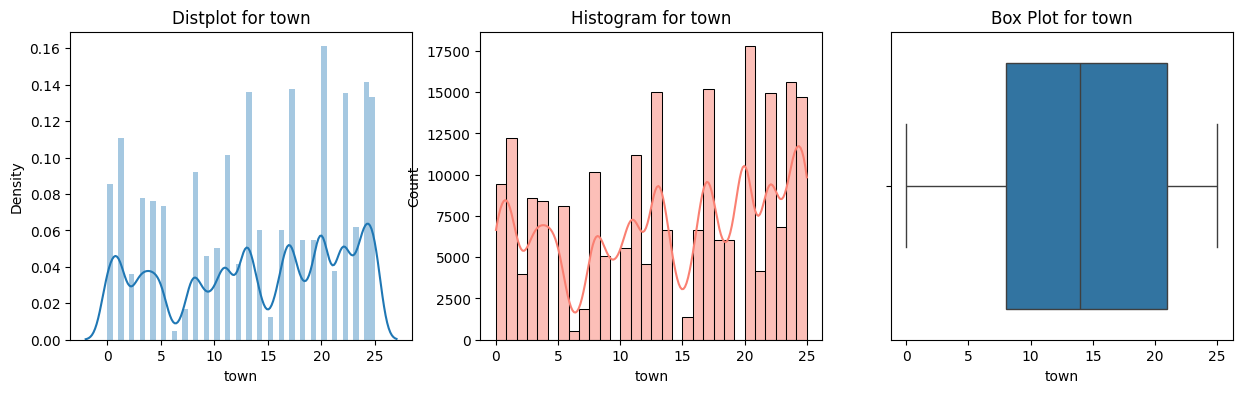

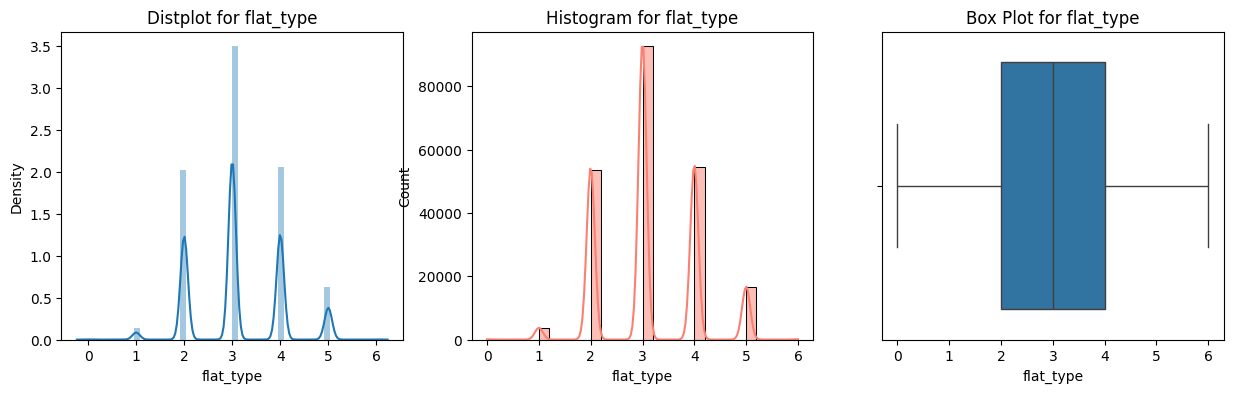

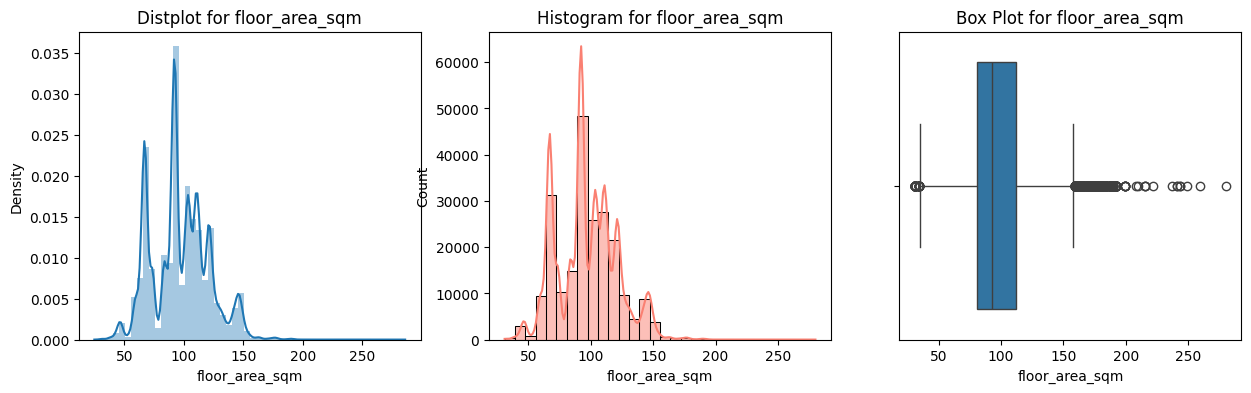

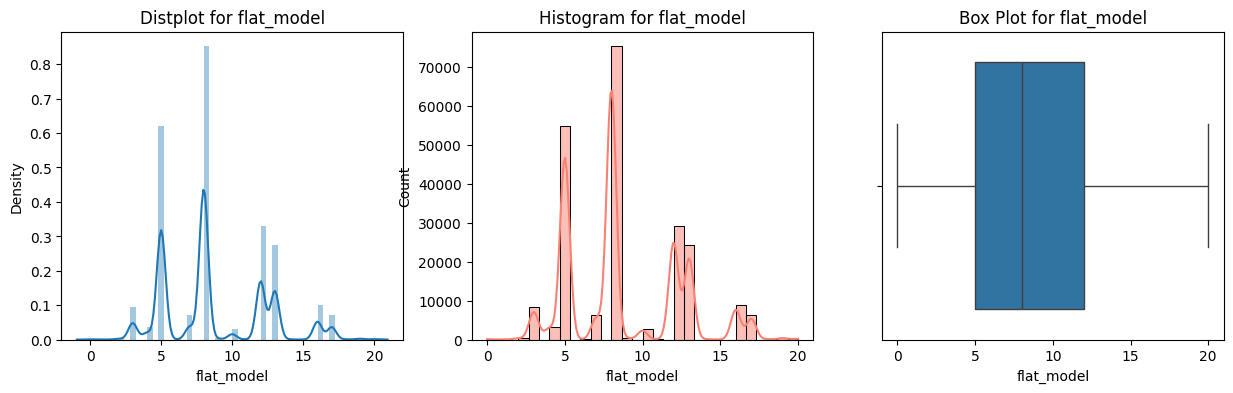

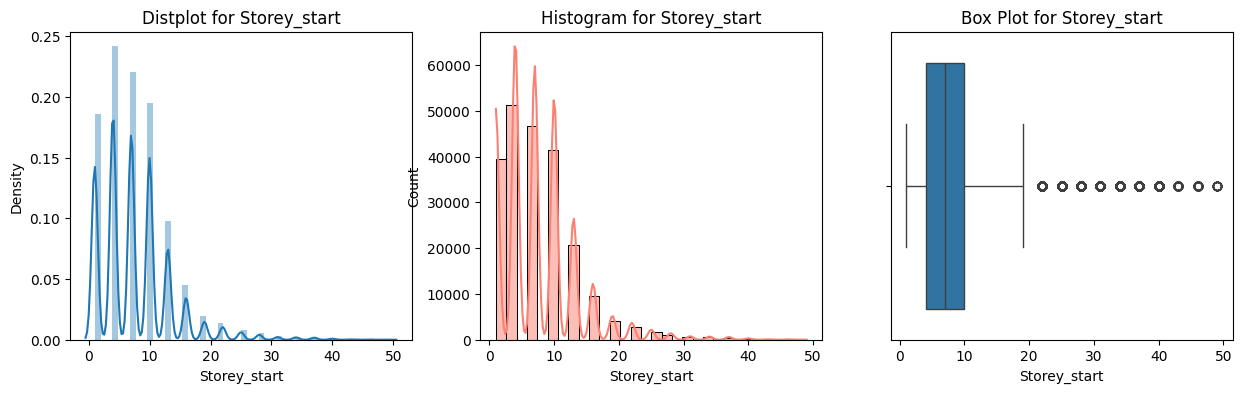

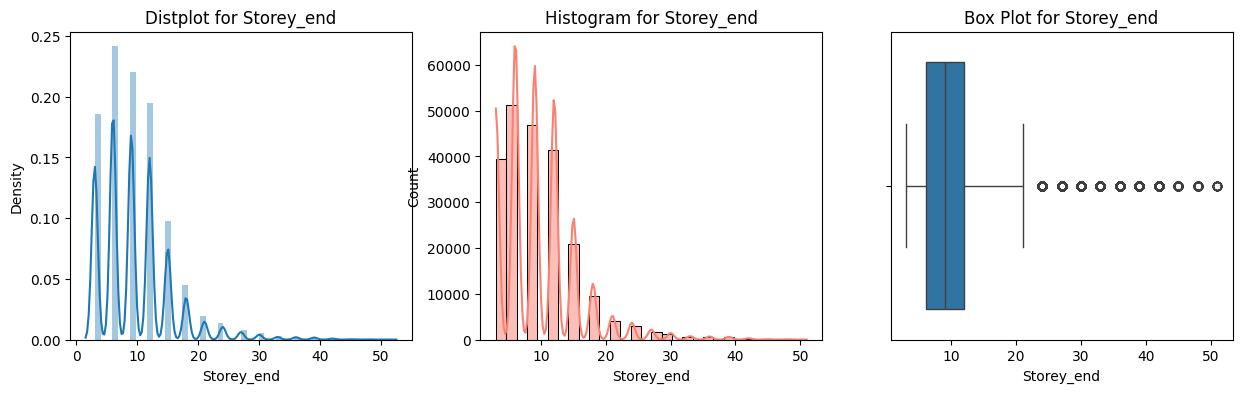

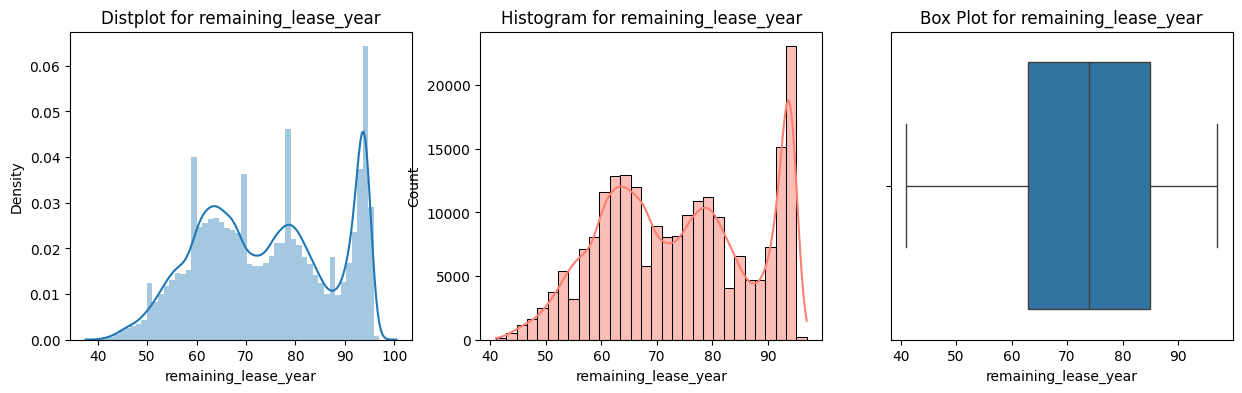

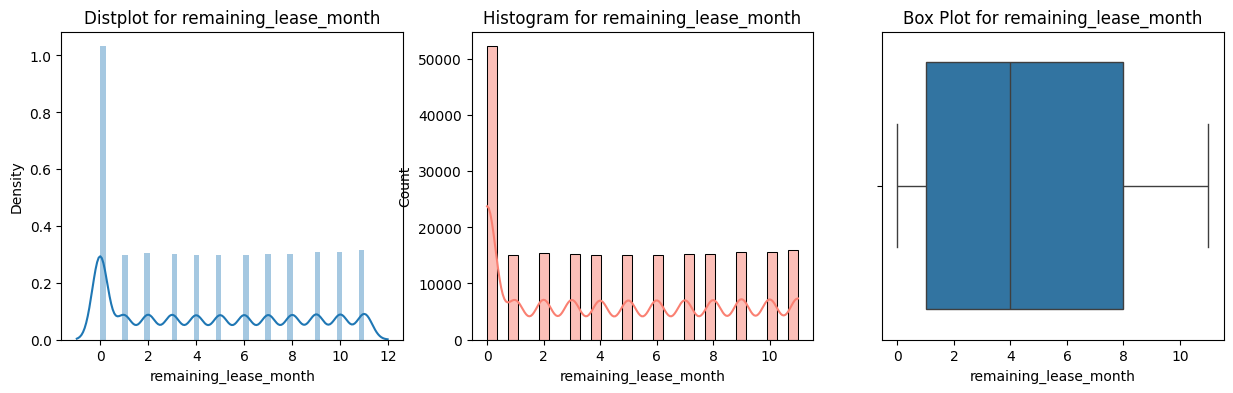

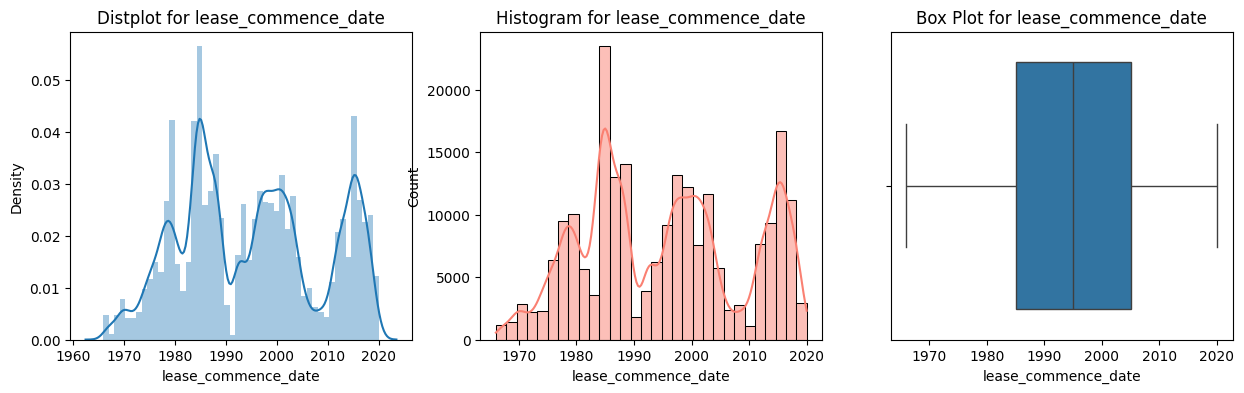

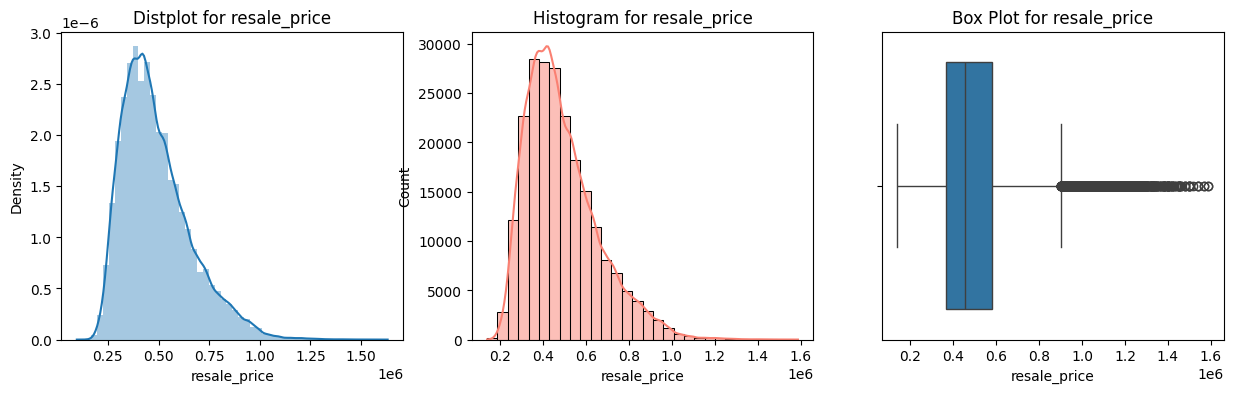

In [42]:
for i in dff2.columns:
    plot(dff2,i)

In [43]:
dff2.describe().T

,count,mean,std,min,25%,50%,75%,max
year,220768.0,2019.665685,2.712664,2015.0,2017.0,2020.0,2022.0,2024.0
town,220768.0,13.890029,7.956663,0.0,8.0,14.0,21.0,25.0
flat_type,220768.0,3.120004,0.919474,0.0,2.0,3.0,4.0,6.0
floor_area_sqm,220768.0,97.109440,24.062383,31.0,81.0,93.0,112.0,280.0
flat_model,220768.0,8.689199,3.644488,0.0,5.0,8.0,12.0,20.0
Storey_start,220768.0,7.660897,5.844660,1.0,4.0,7.0,10.0,49.0
Storey_end,220768.0,9.660897,5.844660,3.0,6.0,9.0,12.0,51.0
remaining_lease_year,220768.0,74.083776,13.505931,41.0,63.0,74.0,85.0,97.0
remaining_lease_month,220768.0,4.612050,3.779514,0.0,1.0,4.0,8.0,11.0
lease_commence_date,220768.0,1995.182884,13.711887,1966.0,1985.0,1995.0,2005.0,2020.0


skewness handling

In [44]:
dff3 = dff2.copy()

In [45]:
# The Skewness Columns are
# 2. storey_start
# 3. storey_end
# 4. resale_price

In [46]:
dff3["Storey_start"] = np.log(dff3["Storey_start"])
dff3["Storey_end"] = np.log(dff3["Storey_end"])
dff3["resale_price"] = np.log(dff3["resale_price"])

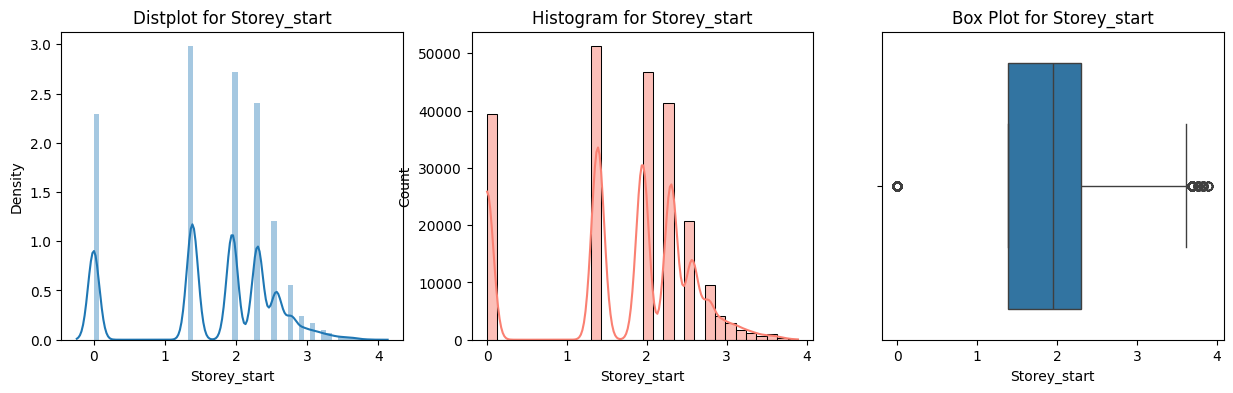

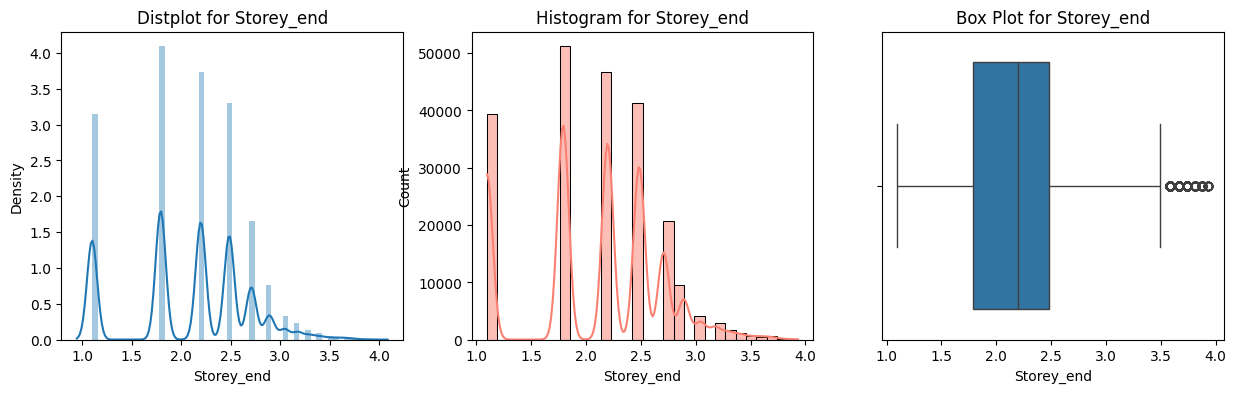

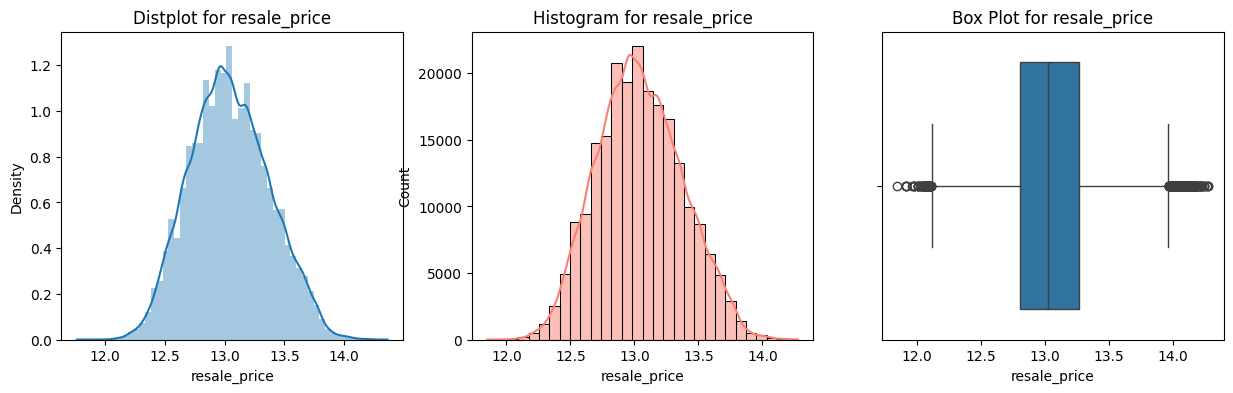

In [47]:
skew_col = ["Storey_start","Storey_end","resale_price"]
for i in skew_col:
    plot(dff3,i)

Outliers Handling - Interquartile Range(IQR) Method

In [48]:
dff4 = dff3.copy()

In [49]:
# The Outlier Columns are

# 1. floor_area_sqm
# 2. Storey_start
# 3. Storey_end
# 4. resale_price
# Recorrect the Outliers

In [50]:
# (Ex: lower threshold = 5 and upper threshold = 20)
# above upper threshold values (>20) are converted to upper threshold value (20) in features
# below lower threshold values (<5)  are converted to lower threshold value (5)  in features

In [51]:
def outlier(df,column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)

    iqr = q3-q1

    upper_threshold = q3 + (1.5 *iqr)
    lower_threshold = q1 - (1.5 *iqr)

    df[column] = df[column].clip(lower_threshold, upper_threshold)

In [52]:
outlier_col = ["floor_area_sqm","Storey_start","Storey_end","resale_price"]
for col in outlier_col:
    outlier(dff4,col)

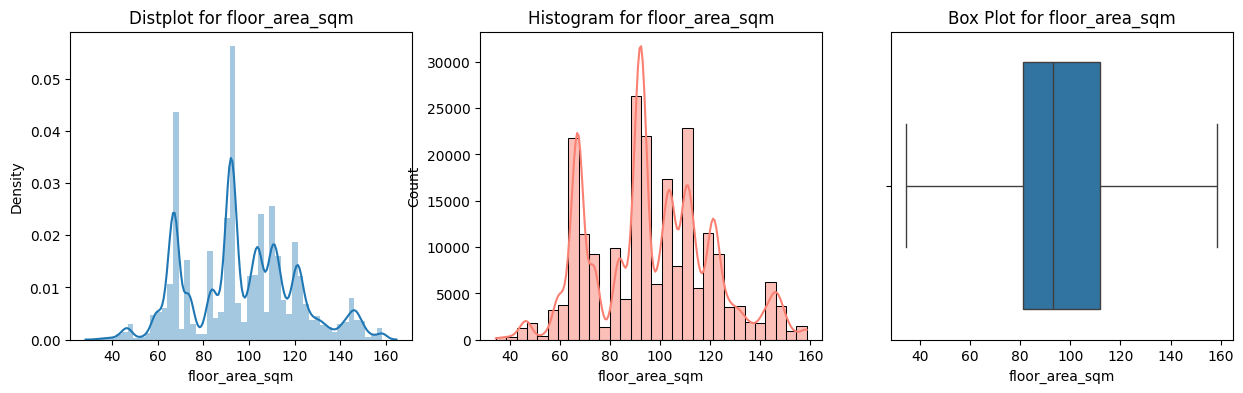

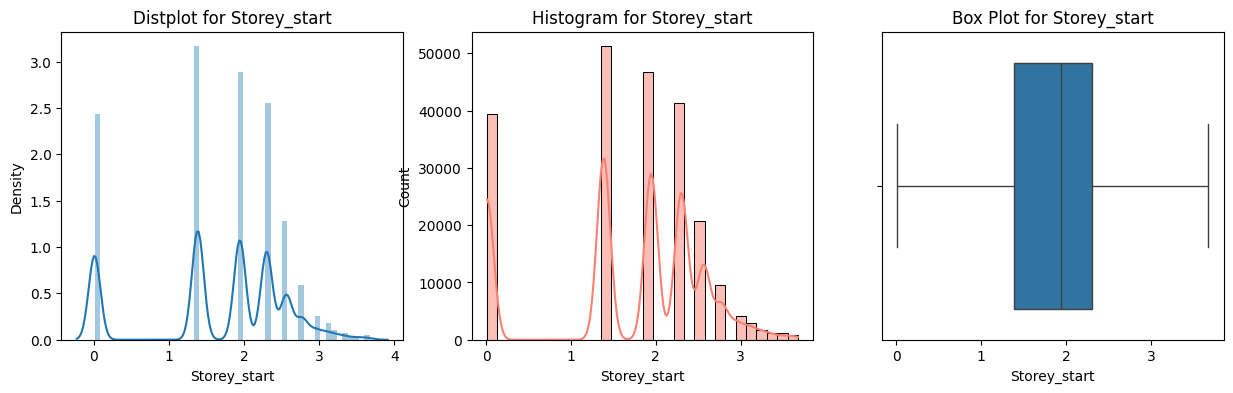

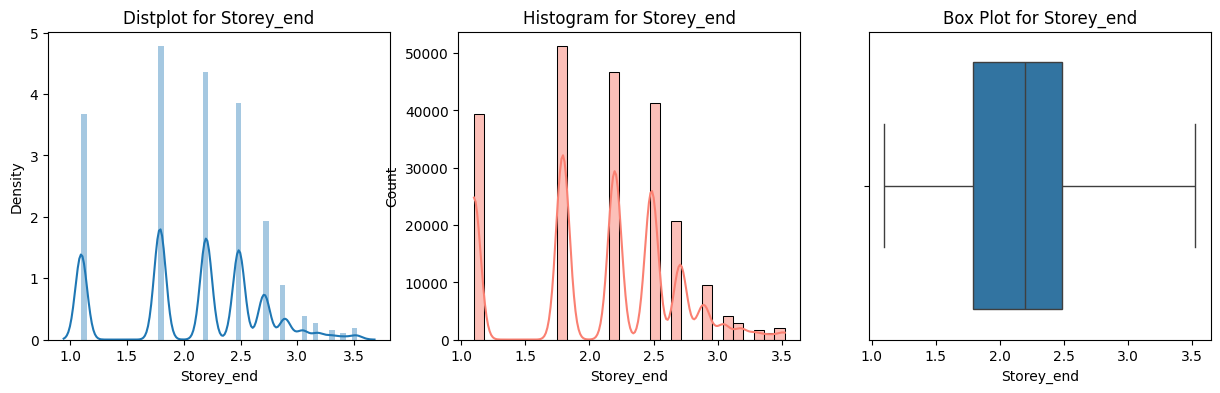

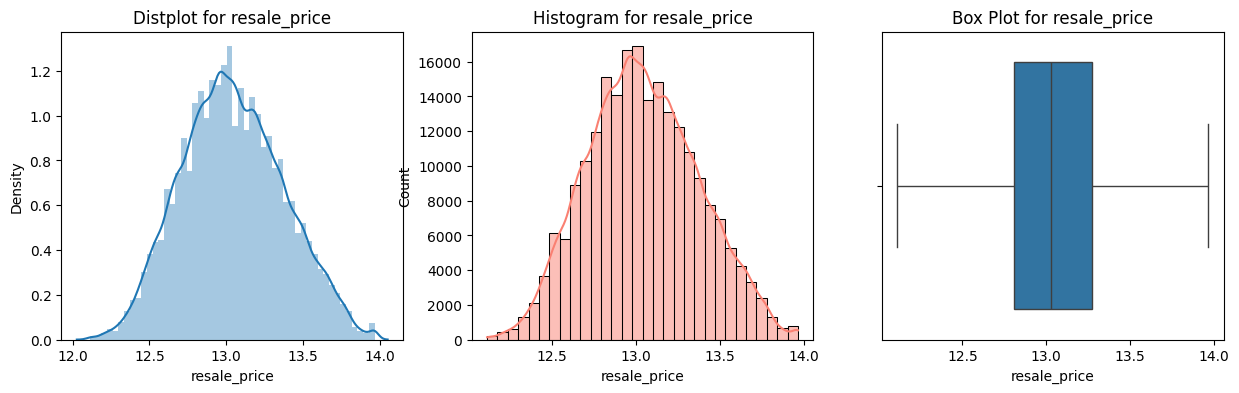

In [53]:
for j in outlier_col:
    plot(dff4,j)

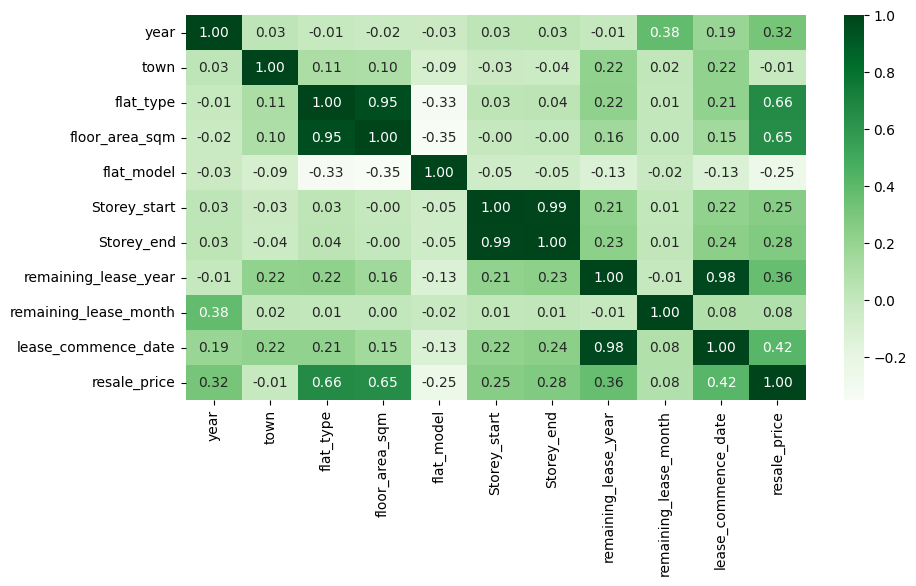

In [54]:
# Checking the correlation after the outlier recorrection

plt.figure(figsize=(10,5))
sns.heatmap(dff4.corr(), annot=True,cmap="Greens",fmt=".2f")
plt.show()

In [55]:
# Model Selection (Regression)

dff5 = dff4.copy()

In [56]:
dff5.describe().T

,count,mean,std,min,25%,50%,75%,max
year,220768.0,2019.665685,2.712664,2015.000000,2017.000000,2020.000000,2022.000000,2024.000000
town,220768.0,13.890029,7.956663,0.000000,8.000000,14.000000,21.000000,25.000000
flat_type,220768.0,3.120004,0.919474,0.000000,2.000000,3.000000,4.000000,6.000000
floor_area_sqm,220768.0,97.036081,23.828397,34.500000,81.000000,93.000000,112.000000,158.500000
flat_model,220768.0,8.689199,3.644488,0.000000,5.000000,8.000000,12.000000,20.000000
Storey_start,220768.0,1.696029,0.920809,0.011858,1.386294,1.945910,2.302585,3.677021
Storey_end,220768.0,2.093670,0.601277,1.098612,1.791759,2.197225,2.484907,3.524627
remaining_lease_year,220768.0,74.083776,13.505931,41.000000,63.000000,74.000000,85.000000,97.000000
remaining_lease_month,220768.0,4.612050,3.779514,0.000000,1.000000,4.000000,8.000000,11.000000
lease_commence_date,220768.0,1995.182884,13.711887,1966.000000,1985.000000,1995.000000,2005.000000,2020.000000


In [57]:
# Max value of resale_price
np.exp(13.965480)

1161798.7399814494

In [58]:
#checking how many datas are outliers based on resale_price

dff1[dff1["resale_price"] >= 1161798]

,year,month,town,flat_type,floor_area_sqm,flat_model,address,Storey_start,Storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
38448,2017,2,2,4.0,120.0,4.0,3227,40,42,93,7,2011,1180000.0
72746,2018,9,14,2.0,237.0,18.0,4889,1,3,52,10,1972,1185000.0
74209,2018,10,7,4.0,106.0,20.0,1943,40,42,91,3,2011,1168000.0
79804,2019,1,14,4.0,117.0,4.0,9268,37,39,90,11,2011,1185000.0
83922,2019,4,4,4.0,112.0,5.0,9591,34,36,95,10,2016,1200000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
220425,2024,7,18,3.0,97.0,14.0,9286,40,42,90,10,2016,1300000.0
220440,2024,7,18,4.0,104.0,13.0,9176,16,18,91,2,2016,1270000.0
220442,2024,7,18,4.0,133.0,8.0,1202,22,24,70,2,1995,1230000.0
220443,2024,7,18,4.0,125.0,5.0,8856,13,15,72,4,1997,1180000.0


In [59]:
# Min of resale_price
np.exp(12.112957)

182217.62618671462

In [60]:
# Checking how many datas are outliers based on resale_price 
dff1[dff1["resale_price"] <= 182217]

,year,month,town,flat_type,floor_area_sqm,flat_model,address,Storey_start,Storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
47067,2017,7,4,0.0,31.0,5.0,8085,4,6,56,8,1975,175000.0
62238,2018,4,10,1.0,42.0,17.0,6206,4,6,49,9,1969,180000.0
62989,2018,4,21,2.0,64.0,5.0,3558,13,15,59,2,1978,170000.0
64274,2018,5,15,1.0,42.0,5.0,1415,1,3,55,11,1975,180000.0
64913,2018,5,23,1.0,40.0,17.0,648,4,6,49,1,1968,182000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
124864,2021,1,4,0.0,31.0,5.0,8085,4,6,53,3,1975,182000.0
126747,2021,1,24,1.0,45.0,5.0,2345,7,9,64,5,1986,180000.0
127297,2021,2,4,0.0,31.0,5.0,8085,4,6,53,1,1975,180000.0
197149,2023,8,22,2.0,67.0,8.0,6378,7,9,91,3,2015,150000.0


In [61]:
# now we want to create the model for "resale_price" prediction
# importing the model

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error ,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import pickle


In [62]:
# Train Test Split from Model Selection

def select_model(df,algo):

    # x, y splitting
    x = df.drop(columns=["resale_price"])
    y = df["resale_price"]

    X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=42)

    model = algo().fit(X_train,Y_train)
    y_pred_train =  model.predict(X_train)
    y_pred_test = model.predict(X_test)

    #Checking the accuracy score

    train_mse = mean_squared_error(Y_train, y_pred_train)
    train_rmse = np.sqrt(train_mse)
    train_mae = mean_absolute_error(Y_train, y_pred_train)
    train_r2 = r2_score(Y_train, y_pred_train)

    test_mse = mean_squared_error(Y_test,y_pred_test)
    test_rmse = np.sqrt(test_mse)
    test_mae = mean_absolute_error(Y_test,y_pred_test)
    test_r2 = r2_score(Y_test,y_pred_test)

    metrics_train = {"Data":"Train Data",
                     "Name":algo.__name__,
                     "R2_Score":train_r2,
                     "Mean_squared_error":train_mse,
                     "Root_mean_squared_error":train_rmse,
                     "Mean_absolute_error":train_mae,
                     }
    
    metrics_test = {"Data":"Test Data",
                     "Name":algo.__name__,
                     "R2_Score":test_r2,
                     "Mean_squared_error":test_mse,
                     "Root_mean_squared_error":test_rmse,
                     "Mean_absolute_error":test_mae,
                     }
    
    print(metrics_train)
    print(metrics_test)
    print("")


In [63]:
select_model(dff5, LinearRegression)
select_model(dff5, DecisionTreeRegressor)
select_model(dff5, RandomForestRegressor)
select_model(dff5, AdaBoostRegressor)
select_model(dff5, ExtraTreesRegressor)
select_model(dff5, GradientBoostingRegressor)
select_model(dff5, XGBRegressor)

{'Data': 'Train Data', 'Name': 'LinearRegression', 'R2_Score': 0.676440212317099, 'Mean_squared_error': 0.03557396197483777, 'Root_mean_squared_error': 0.18861060939098248, 'Mean_absolute_error': 0.14761109017897936}
{'Data': 'Test Data', 'Name': 'LinearRegression', 'R2_Score': 0.6801987948001904, 'Mean_squared_error': 0.0357647231049231, 'Root_mean_squared_error': 0.18911563421600844, 'Mean_absolute_error': 0.14798777115875528}

{'Data': 'Train Data', 'Name': 'DecisionTreeRegressor', 'R2_Score': 0.9962373663805814, 'Mean_squared_error': 0.0004136848594845304, 'Root_mean_squared_error': 0.02033924431940701, 'Mean_absolute_error': 0.00720905240764682}
{'Data': 'Test Data', 'Name': 'DecisionTreeRegressor', 'R2_Score': 0.9266101439530514, 'Mean_squared_error': 0.008207498400730996, 'Root_mean_squared_error': 0.09059524491236279, 'Mean_absolute_error': 0.06457305151866533}

{'Data': 'Train Data', 'Name': 'RandomForestRegressor', 'R2_Score': 0.9912178790697793, 'Mean_squared_error': 0.00096

In [64]:
# RandomForestClassifier is good interpretability,
# And it will detect the unseen data for this datas (without overfitting)
# so i select the algorithm

# Data splitting

x = dff5.drop(columns=["resale_price"])
y = dff5["resale_price"]

X_train, X_test, Y_train, Y_test = train_test_split(x, y , test_size=0.2, random_state=42)

model1 = RandomForestRegressor().fit(X_train,Y_train)
y_pred = model1.predict(X_test)

test_mse = mean_squared_error(Y_test,y_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(Y_test,y_pred)
test_r2 = r2_score(Y_test,y_pred)

metrics_test = {"Data":"Test Data",
                     "Name":RandomForestRegressor.__name__,
                     "R2_Score":test_r2,
                     "Mean_squared_error":test_mse,
                     "Root_mean_squared_error":test_rmse,
                     "Mean_absolute_error":test_mae,
                     }

print(metrics_test)

{'Data': 'Test Data', 'Name': 'RandomForestRegressor', 'R2_Score': 0.9553584305849674, 'Mean_squared_error': 0.004992455760447512, 'Root_mean_squared_error': 0.07065731215130895, 'Mean_absolute_error': 0.05177189850805527}


In [78]:
dff5.iloc[10456]

year                     2015.000000
town                        4.000000
flat_type                   2.000000
floor_area_sqm             74.000000
flat_model                  8.000000
Storey_start                0.011858
Storey_end                  1.098612
remaining_lease_year       68.000000
remaining_lease_month       0.000000
lease_commence_date      1985.000000
resale_price               12.815838
Name: 10456, dtype: float64

In [79]:
np.exp(12.815838)

367999.92008841544

In [83]:
user_data = np.array([[2015,4,2,74,8,0.011858,1.098612,68,0,1985]])
y_pred1 = model1.predict(user_data)
y_pred1[0]

12.815294056085863

In [84]:
np.exp(12.815294056085863)

367799.8032025958

In [87]:
import pickle

In [88]:
# Saving the Model using Pickle
with open("ResaleFlatPrices_model.pkl","wb") as f:
    pickle.dump(model1,f)

In [89]:
with open("ResaleFlatPrices_model.pkl","rb") as f1:
    regg_model = pickle.load(f1)

In [110]:
user_data = np.array([[2015,8,5,4.955827,3,1.386294,1.791759,73,0,1990]])
y_pred_1 = regg_model.predict(user_data)
y_pred_1[0]

12.260021596126949

In [111]:
np.exp(12.260021596126949)

211086.14433426436